# **Convolutional Neural Networks: Street View Housing Number Digit Recognition**

This project aims at classification using Convolutional Neural Networks. This work is the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

Build a CNN model that can identify the digits in the images.

-------------
### **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

## **Mount the drive**
Let us start by mounting the drive and importing the necessary libraries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

Check for the version of TensorFlow.

In [ ]:
print(tf.__version__)

2.8.0


## **Load the dataset**
- Load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [ ]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Check the number of images in the training and testing data.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observations**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualize images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

#### **Complete the below code to visualize the first 10 images from the training data)**

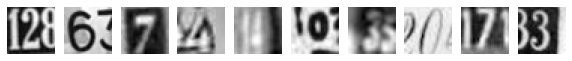

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# visualize the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray") # write the function to visualize images
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data Preparation**

- Print the first image in the train image and figure out the shape of the images
- Reshape the train and the test dataset to make them fit the first convolutional operation that we will create later. Figure out the required shape
- Normalize the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test set
- One-hot encode the target variable

In [ ]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshape the dataset to flatten them. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


#### **One-hot encode the labels in the target variable y_train and y_test**

In [ ]:
# Write the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

# test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Build a CNN model.

In [ ]:
# Fix the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 32, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

#### **Build and train a CNN model as per the above mentioned architecture**

In [ ]:
# Import losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

# Define the function
def cnn_model_1():
    model = Sequential([
      Conv2D(16, 3, padding = 'same', input_shape=(32, 32, 1)),
      LeakyReLU(alpha = .1),
      Conv2D(32, 3, padding = 'same'),
      LeakyReLU(alpha = .1),
      MaxPool2D(pool_size = (2,2)),
      Flatten(),
      Dense(32),
      LeakyReLU(alpha = .1),
      Dense(10, activation = 'softmax')     
    ]) 
    #Add layers as per the architecture mentioned above in the same sequence
    
    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate=1e-3)
    
    #compile the model
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = (['accuracy']))
    
    return model

In [ ]:
# Build the model
model_1 = cnn_model_1()

In [ ]:
# Print the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [ ]:
# Fit the model
history_model_1 = model_1.fit(X_train, y_train, validation_split = .2, batch_size = 32, verbose = 1, epochs = 20)

Epoch 1/20
1050/1050 [==============================] - 14s 4ms/step - loss: 1.1929 - accuracy: 0.6043 - val_loss: 0.6403 - val_accuracy: 0.8123
Epoch 2/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.5309 - accuracy: 0.8487 - val_loss: 0.5028 - val_accuracy: 0.8570
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4342 - accuracy: 0.8739 - val_loss: 0.4908 - val_accuracy: 0.8608
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3770 - accuracy: 0.8898 - val_loss: 0.4447 - val_accuracy: 0.8768
Epoch 5/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3336 - accuracy: 0.9008 - val_loss: 0.4719 - val_accuracy: 0.8696
Epoch 6/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2948 - accuracy: 0.9135 - val_loss: 0.4785 - val_accuracy: 0.8655
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2660 - accuracy: 0.9194 - val_loss: 0.4557 - val_accuracy

### **Plot the validation and training accuracies**

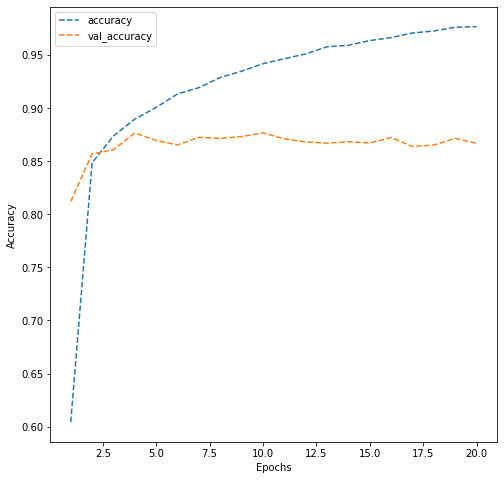

In [ ]:
# plot the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
* **1. Accuracy reaches 0.95 above** - The performance of training is pretty good. It starts from around 0.60 but increases sharply in the 2nd and 3rd time immediately to 0.85. Then the accuracy rises all the way to 0.95 above at the final 30th epoch. It does not show the limitation yet. It could potentially keep rising with more epochs.
* **2. Valuation accuracy has a great start, but fails to increase** - The valuation accuracy starts at 0.80 which is a very good start. Then it increases not too much and keeps around 0.85 around all the way from the 5th to 30th epochs.
* **3. Valuation accuracy has a big gap with accuracy with a high risk of overfitting** - The valuation accuracy goes up too much and follows far behind accuracy with a significant gap. While accuracy reaches 0.95 above but the valuation accuracy is still 0.85. We believe there's a huge risk of overfitting and we need to tune the model**

Build another model and see if we can get a better model with generalized performance.

We need to clear the previous model's history from the keras backend. Also, fix the seed again after clearing the backend.

In [ ]:
# Clear backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fix the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write the function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **dropout layer with rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Store the model building history to use later for visualization.

#### **Build and train the second CNN model as per the above mentioned architecture**

In [ ]:
# Define the function
def cnn_model_2():
    model = Sequential([
      Conv2D(16, 3, padding ='same', input_shape=(32, 32,1)),
      LeakyReLU(alpha = .1),
      Conv2D(32, 3, padding = 'same'),
      LeakyReLU(alpha = .1),
      MaxPool2D(pool_size = (2,2)),
      BatchNormalization(),
      Conv2D(32, 3, padding = 'same'),
      LeakyReLU(alpha = .1),
      Conv2D(64, 3, padding = 'same'),
      LeakyReLU(alpha = .1),
      MaxPool2D(pool_size = 2),
      BatchNormalization(),
      Flatten(),
      Dense(32),
      LeakyReLU(alpha = .1),
      Dropout(.5),
      Dense(10, activation = 'softmax')     
    ]) 
    # Add layers as per the architecture mentioned above in the same sequence
    
    # declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate = 1e-3)
    
    # compile the model
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics =(['accuracy']))
    
    return model

In [ ]:
# Build the model
model_2 = cnn_model_2()

In [ ]:
# Print the summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [ ]:
# Fit the model
history_model_2 = model_2.fit(X_train, y_train, validation_split = .2, batch_size = 128, verbose = 1, epochs =30)

Epoch 1/30
263/263 [==============================] - 4s 12ms/step - loss: 1.4808 - accuracy: 0.4930 - val_loss: 2.6989 - val_accuracy: 0.1246
Epoch 2/30
263/263 [==============================] - 2s 9ms/step - loss: 0.7039 - accuracy: 0.7838 - val_loss: 0.5395 - val_accuracy: 0.8402
Epoch 3/30
263/263 [==============================] - 2s 9ms/step - loss: 0.5687 - accuracy: 0.8266 - val_loss: 0.4700 - val_accuracy: 0.8623
Epoch 4/30
263/263 [==============================] - 2s 9ms/step - loss: 0.5016 - accuracy: 0.8451 - val_loss: 0.4622 - val_accuracy: 0.8612
Epoch 5/30
263/263 [==============================] - 2s 9ms/step - loss: 0.4535 - accuracy: 0.8629 - val_loss: 0.4463 - val_accuracy: 0.8795
Epoch 6/30
263/263 [==============================] - 2s 9ms/step - loss: 0.4171 - accuracy: 0.8717 - val_loss: 0.3861 - val_accuracy: 0.8920
Epoch 7/30
263/263 [==============================] - 2s 9ms/step - loss: 0.3887 - accuracy: 0.8798 - val_loss: 0.3739 - val_accuracy: 0.8987
Epoch

### **Plotting the validation and training accuracies**

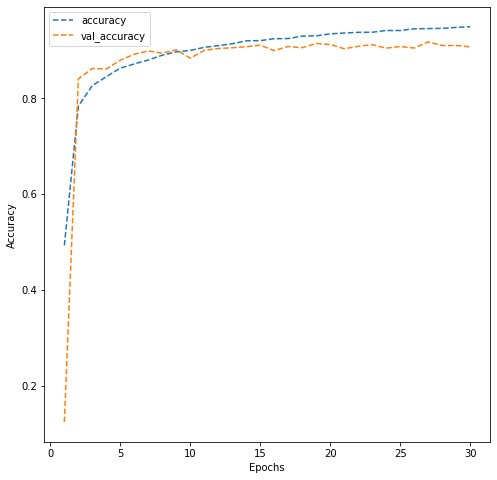

In [ ]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:
* **1. Accuracy reaches 0.95 and it could be the limitation of the performance** - The performance of this model on training data is pretty good. It starts from around 0.5 but increases sharply in the 2nd and 3rd epochs immediately to 0.85. Then the accuracy rises all the way to 0.95 around at the final 30th epoch. It does show it's almost approaching the limitation. It could potentially not perform any better with more epochs.
* **2. Valuation accuracy has a great start, and also reach the limitation to increase** - The valuation accuracy starts at 0.10 which is a very low start. Then it learns and increases sharply in the 2nd and 3rd epochs. Then it reaches 0.9 around all the way to the 30th epoch. It looks like reaching the limitation and won't perform any better with more epochs.
* **3. Valuation accuracy cathes up with accuracy tightly without overfitting issue** - The accuracy and valuation accuracy all goes sharply in the 2nd and 3rd epochs and reaches a high range to increase slowly togther. Eventually the 30th epoch shows 0.95 vs 0.9 which is a very close performance. We believe there's no issue of overfitting and it's a very good model**_**

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using the classification report and the confusion matrix
- Final observations from the obtained results

In [ ]:
# Make prediction on the test data using model_2 
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Convert each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1814
           1       0.90      0.89      0.90      1828
           2       0.93      0.92      0.92      1803
           3       0.90      0.85      0.87      1719
           4       0.89      0.94      0.91      1812
           5       0.90      0.91      0.90      1768
           6       0.86      0.91      0.88      1832
           7       0.91      0.94      0.92      1808
           8       0.94      0.83      0.89      1812
           9       0.92      0.89      0.90      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



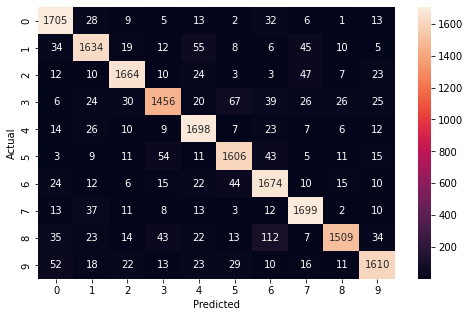

In [ ]:
# import required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Print the classification report
print(classification_report(y_test, test_pred))

# Plot the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations:
* **1. Overall the accuracy is 0.90** - The confusion matrix on the test data shows that no matter from macro or weighted average to see the overall accuracy is 0.9. The f1 score ranges from 0.87 to 0.92. We're good at this model's performance.
* **2. Recall ranges from 0.83 to 0.94- Among all the 10 classes, recall ranges from 0.83 to 0.94** - The class 0, 4, and 7 work the best 0.94, and class 8 works the worst with 0.83. Overall it's still in a very good range.
* **3. The best class 0, 3, and 7 with the highest performance is the label "2", "4", and "0"** - All the 3 classes look like no confusion for the model to learn. The model works the best with a recall of 0.94. (the f1 score 0.92 - still pretty high).
* **4. The worse class 8 with the lowest performance is the label "7"** - Class 8 has two very distractive "1" for the model to be confused. The model performs a little bit lower with a recall of 0.83. (the f1 score 0.89). However, the accuracy of 0.83 is much better than the coin-flipping 50% chance.
* **5. More LeakyReLU activations, Maxpool2D, and BatchNormalization layer work very well** - We add 4 LeakyReLU activations in the feature learning part. The LeakyReLU activation improves the "zero" problem of the ReLu activation and makes it learn faster. We also use Maxpool2D to
apply a 2D max pooling over an input signal composed of the input planes. It could downsample. The Batch Normalization training works well in our very deep neural networks that standardize the inputs to a layer for each mini-batch. This add-on has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks. We found the 2nd model solves the overfitting problem while making it deeper.
* **6. Conclusion of this CNN model** - We learn the new technique to utilize the CNN model with more tuning techniques like more layers with LeakyReLU, MaxPool2D, BatchNormalization, and more epochs to make the model perform better without overfitting. CNN model is a very good machine learning approach.
